In [1]:
import os
import fnmatch
import pandas as pd
from os.path import isfile, join
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Topological charge

    In this script I will analyze the topological charge in a Cairo Lattice if we increse linearly up from 0 mT to 50 mT with a rate of 0.0333 mT/s (1500 s). Then we are Analyzing the output data of Script-1.2.

In [2]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-12.0"

In [3]:
#slope = 50/1500
#slope

In [4]:
Cairo = []
for file in os.listdir(data_directory):
    if fnmatch.fnmatch(file, 'ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp*.dat'):
        print(file)
        Cairo.append(pd.read_csv(join(data_directory,file), sep = "\t", index_col = [0,1])) 
        
keys_Cairo = []
for i in range(len(Cairo)):
    keys_Cairo.append(i)

ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp5.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp0.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp9.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp4.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp3.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp6.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp1.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp2.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp7.dat
ACI_ShaktiLattice_25mT-2500s_FreeBound_l10_exp8.dat


In [5]:
Cairo_exp = pd.concat(Cairo, keys = keys_Cairo)

In [6]:
Cairo_exp.index.names = ['Exp', 'frame', 'id']

In [7]:
Cairo_exp

x            y  coordination  charge   dx   dy
Exp frame id                                                            
0   0     0      -28.384776   -56.769553             3       1 -1.0  2.0
          1     1107.006276  1021.851947             3       1  1.0  2.0
          2     1050.236724  1050.236724             2      -2 -1.0 -1.0
          3      965.082395   709.619408             3      -1 -2.0  1.0
          4      823.158513  1021.851947             3      -1 -1.0  0.0
...                     ...          ...           ...     ...  ...  ...
9   2500  1232  1107.006276   709.619408             2       0 -1.0  1.0
          1233   652.849855   -85.154329             2       0 -1.0 -1.0
          1234   -28.384776   936.697618             2       0  1.0 -1.0
          1235   -28.384776   823.158513             2       0  1.0 -1.0
          1236   -28.384776   766.388960             2       0  1.0  1.0

[6197370 rows x 6 columns]

In [8]:
Cairo_exp = Cairo_exp.query('coordination != 2')

In [9]:
Cairo_exp['time'] = (Cairo_exp.index.get_level_values('frame'))

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## 1. Total topological charge

In [10]:
Topo_q = Cairo_exp.groupby('time').sum()/Cairo_exp.groupby('time').count()

In [11]:
Topo_q

,x,y,coordination,charge,dx,dy
time,,,,,,
0,539.31075,482.541197,3.310939,0.000689,0.028596,0.018260
5,539.31075,482.541197,3.310939,0.000689,0.028596,0.018260
10,539.31075,482.541197,3.310939,0.000689,0.028596,0.018605
15,539.31075,482.541197,3.310939,0.000689,0.028252,0.018260
20,539.31075,482.541197,3.310939,0.000689,0.027562,0.018260
...,...,...,...,...,...,...
2480,539.31075,482.541197,3.310939,-0.000689,0.027907,0.008958
2485,539.31075,482.541197,3.310939,-0.000689,0.024462,0.011714
2490,539.31075,482.541197,3.310939,-0.000517,0.023600,0.006891


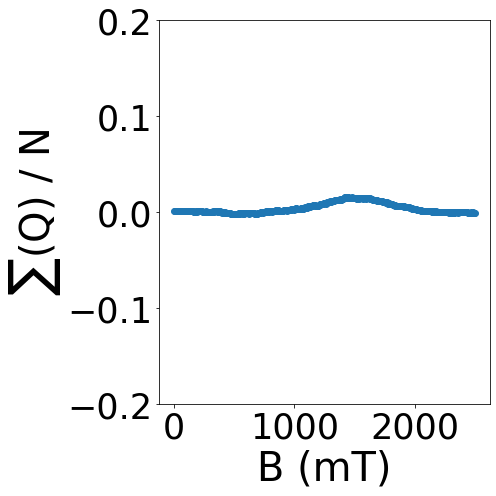

In [12]:
fig, ax1 = plt.subplots(figsize=(7,7))

plt.plot(Topo_q.index.get_level_values('time'), Topo_q.charge, 'o')

ax1.tick_params(axis='y', labelsize=35)
ax1.tick_params(axis='x', labelsize=35)  

ax1.set_xlabel('B (mT)', size = 40)
ax1.set_ylabel('$\sum$(Q) / N', size = 40)
ax1.set_ylim(-0.2,0.2)

plt.tight_layout()

### 2. Total topological charge of each sublattice

In [13]:
Cairo_exp.groupby(['time','coordination']).sum()


x             y  charge     dx     dy
time coordination                                                  
0    3             4.314486e+06  3.860330e+06     -62  288.0  238.0
     4             1.946912e+06  1.741974e+06      70   44.0  -26.0
5    3             4.314486e+06  3.860330e+06     -62  288.0  238.0
     4             1.946912e+06  1.741974e+06      70   44.0  -26.0
10   3             4.314486e+06  3.860330e+06     -64  288.0  240.0
...                         ...           ...     ...    ...    ...
2490 4             1.946912e+06  1.741974e+06   -9470   94.0   -4.0
2495 3             4.314486e+06  3.860330e+06    9490  162.0   84.0
     4             1.946912e+06  1.741974e+06   -9500   90.0   10.0
2500 3             4.314486e+06  3.860330e+06    9486  244.0  102.0
     4             1.946912e+06  1.741974e+06   -9500   94.0    2.0

[1002 rows x 5 columns]

In [14]:
df1 = Cairo_exp.groupby(['time','coordination']).sum()/Cairo_exp.groupby(['time','coordination']).count()


In [15]:
err = Cairo_exp.groupby(['time','coordination']).std()/np.sqrt(Cairo_exp.groupby(['time','coordination']).count())

In [16]:
df = df1['charge'].to_frame()
df['err'] = err['charge']

In [17]:
df

charge       err
time coordination                    
0    3            -0.007750  0.019171
     4             0.019391  0.033424
5    3            -0.007750  0.019171
     4             0.019391  0.033424
10   3            -0.008000  0.019171
...                     ...       ...
2490 4            -2.623269  0.015909
2495 3             1.186250  0.014335
     4            -2.631579  0.015982
2500 3             1.185750  0.014393
     4            -2.631579  0.016002

[1002 rows x 2 columns]

In [21]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "red", "purple", 
                                                    "orange", "royalblue", "limegreen", 
                                                    "blueviolet","darkorange", "tomato",
                                                    "red","black"])

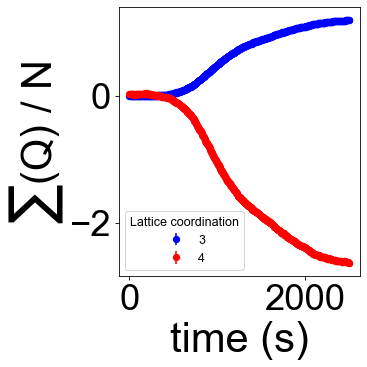

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

for typ_m, mtype in df.groupby('coordination'):
    
    plt.errorbar(mtype.index.get_level_values("time"), mtype["charge"],yerr = mtype['err'],fmt ='o', label = typ_m)
    #plt.plot(mtype.index.get_level_values("time"), mtype["charge"],'-', label = typ_m)

    
ax.tick_params(axis='y', labelsize=35)
ax.tick_params(axis='x', labelsize=35) 
ax.legend(fontsize = 12, title= 'Lattice coordination', title_fontsize = 12, ncol = 1)


ax.set_xlabel('time (s)', size = 40)
ax.set_ylabel('$\sum$(Q) / N', size = 40)


plt.tight_layout()
plt.savefig('ChargeTransfer_shakti_N=10.png', bbox_inches='tight')